In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Import scikit-learn modules
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm      

In [2]:
# Define the file paths
data_file = ("car.data")
names_file = ("car.c45-names")
# Read the names file to extract attribute names
with open(names_file, 'r') as f:
    lines = f.readlines()

# Parse attribute names
attributes = [line.split(':')[0].strip() for line in lines if line.strip() and not line.startswith('|')]
attribute_names = [attr.split(',')[0].strip() for attr in attributes]

# Read the data file into a DataFrame
df = pd.read_csv(data_file, header=None, names=attribute_names)

# Display the first few rows of the DataFrame
print(df.head())


   unacc buying maint doors persons lug_boot safety
0  vhigh  vhigh     2     2   small      low  unacc
1  vhigh  vhigh     2     2   small      med  unacc
2  vhigh  vhigh     2     2   small     high  unacc
3  vhigh  vhigh     2     2     med      low  unacc
4  vhigh  vhigh     2     2     med      med  unacc


In [3]:
df['unacc'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [4]:
#df['unacc']=df['unacc'].replace ({'vhigh':1, 'high':2, 'med':3, 'low':4})

In [5]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [6]:
df['buying']=df['buying'].replace({'vhigh':1, 'high':2, 'med':3, 'low':4})

In [7]:
df['maint'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [8]:
df['maint']=df['maint'].replace({'5more':5})

In [9]:
df['doors'].unique()

array(['2', '4', 'more'], dtype=object)

In [10]:
df['doors']=df['doors'].replace({'more':5})

In [11]:
df['persons'].unique()

array(['small', 'med', 'big'], dtype=object)

In [12]:
df['persons']=df['persons'].replace({'small':3, 'med':2, 'big':1})

In [13]:
df['lug_boot'].unique()

array(['low', 'med', 'high'], dtype=object)

In [14]:
df['lug_boot']=df['lug_boot'].replace({'low':3 , 'med':2 , 'high':1})

In [15]:
df['safety'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [16]:
df['safety']=df['safety'].replace({'unacc':4, 'acc':3, 'vgood':1, 'good':2})

In [17]:
df

,unacc,buying,maint,doors,persons,lug_boot,safety
0,vhigh,1,2,2,3,3,4
1,vhigh,1,2,2,3,2,4
2,vhigh,1,2,2,3,1,4
3,vhigh,1,2,2,2,3,4
4,vhigh,1,2,2,2,2,4
...,...,...,...,...,...,...,...
1723,low,4,5,5,2,2,2
1724,low,4,5,5,2,1,1
1725,low,4,5,5,1,3,4
1726,low,4,5,5,1,2,2


In [18]:
df.isna().sum()

unacc       0
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   unacc     1728 non-null   object
 1   buying    1728 non-null   int64 
 2   maint     1728 non-null   object
 3   doors     1728 non-null   object
 4   persons   1728 non-null   int64 
 5   lug_boot  1728 non-null   int64 
 6   safety    1728 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 94.6+ KB


In [20]:
# Convert object columns to int64
df['maint'] = df['maint'].astype('int64')
df['doors'] = df['doors'].astype('int64')

# Print the data types after conversion
print(df.dtypes)


unacc       object
buying       int64
maint        int64
doors        int64
persons      int64
lug_boot     int64
safety       int64
dtype: object


In [21]:
x = df.drop(columns=['unacc']) 
y = df['unacc']  

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=8)

In [23]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [24]:
svm.score(x_test,y_test)

0.24566473988439305

In [25]:
svm.predict(x_test)

array(['med', 'vhigh', 'high', 'high', 'low', 'med', 'low', 'low', 'low',
       'low', 'med', 'med', 'med', 'low', 'high', 'high', 'vhigh', 'low',
       'low', 'high', 'low', 'high', 'med', 'low', 'low', 'low', 'low',
       'low', 'med', 'low', 'high', 'vhigh', 'med', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'high', 'vhigh', 'vhigh',
       'vhigh', 'vhigh', 'low', 'low', 'low', 'med', 'low', 'high', 'low',
       'low', 'high', 'vhigh', 'high', 'low', 'low', 'high', 'low', 'low',
       'vhigh', 'low', 'med', 'low', 'vhigh', 'high', 'low', 'med', 'low',
       'med', 'med', 'low', 'vhigh', 'med', 'vhigh', 'low', 'vhigh',
       'high', 'med', 'vhigh', 'med', 'low', 'low', 'med', 'high', 'high',
       'low', 'med', 'high', 'low', 'low', 'high', 'low', 'high', 'low',
       'low', 'low', 'vhigh', 'vhigh', 'high', 'low', 'low', 'vhigh',
       'low', 'high', 'low', 'low', 'low', 'low', 'vhigh', 'low', 'med',
       'med', 'low', 'low', 'low', 'low', 'low', 'low'

In [26]:
from sklearn.svm import SVC
svm1 = SVC(C=0.1, kernel="sigmoid", gamma="auto") 
svm1.fit(x_train, y_train)


SVC(C=0.1, gamma='auto', kernel='sigmoid')

In [27]:
svm1.score(x_test,y_test)

0.1994219653179191

In [28]:
from sklearn.svm import SVC
svm2 = SVC(C=0.1, kernel="poly", gamma="auto") 
svm2.fit(x_train, y_train)

SVC(C=0.1, gamma='auto', kernel='poly')

In [29]:
svm2.score(x_test,y_test)

0.28901734104046245

In [30]:
from sklearn.svm import SVC
svm3 = SVC(C=0.1, kernel="linear", gamma="auto") 
svm3.fit(x_train, y_train)

SVC(C=0.1, gamma='auto', kernel='linear')

In [31]:
svm3.score(x_test,y_test)

0.3265895953757225

In [32]:
from sklearn.svm import SVC
svm4 = SVC(C=0.1, kernel="rbf", gamma="auto") 
svm4.fit(x_train, y_train)

SVC(C=0.1, gamma='auto')

In [33]:
svm4.score(x_test,y_test)

0.30057803468208094

In [34]:
print("kernel=sigmoid"+" SVM1 Score"+str(svm1.score(x_test,y_test)))
print("kernel=Poly"+" SVM2 Score"+ str(svm2.score(x_test,y_test)))
print("kernel=linear"+" SVM3 Score"+ str(svm3.score(x_test,y_test)))
print("kernel=rbf"+" SVM4 Score"+ str(svm4.score(x_test,y_test)))


kernel=sigmoid SVM1 Score0.1994219653179191
kernel=Poly SVM2 Score0.28901734104046245
kernel=linear SVM3 Score0.3265895953757225
kernel=rbf SVM4 Score0.30057803468208094


In [35]:
from sklearn.metrics import confusion_matrix
y_pred = svm3.predict(x_test)
confusion_matrix(y_test, y_pred)     

array([[11, 30,  9, 45],
       [ 1, 40,  4, 24],
       [ 7, 46,  8, 28],
       [ 9, 28,  2, 54]], dtype=int64)

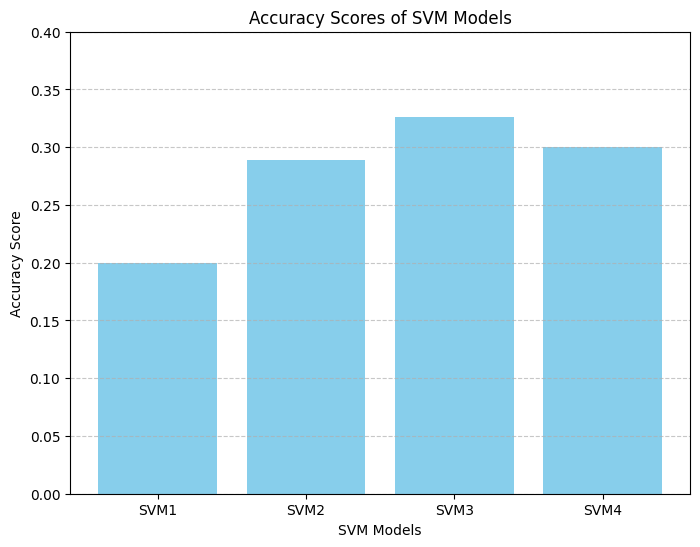

In [36]:
import matplotlib.pyplot as plt

# Model names
models = ['SVM1', 'SVM2', 'SVM3', 'SVM4']

# Accuracy scores
scores = [0.1994219653179191, 0.28901734104046245, 0.3265895953757225, 0.30057803468208094]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, scores, color='skyblue')
plt.title('Accuracy Scores of SVM Models')
plt.xlabel('SVM Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 0.4)  # Set the y-axis limits to better visualize the differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
